# Iris Data

## Loading libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm

In [2]:
df = sns.load_dataset('iris')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
col = ['petal_length', 'petal_width', 'species']
df.loc[:, col].head()

,petal_length,petal_width,species
0,1.4,0.2,setosa
1,1.4,0.2,setosa
2,1.3,0.2,setosa
3,1.5,0.2,setosa
4,1.4,0.2,setosa


In [5]:
col = ['petal_length', 'petal_width']
X = df.loc[:, col]

In [6]:
species_to_num = {'setosa': 0,
                  'versicolor': 1,
                  'virginica': 2
                 }
df['tmp'] = df['species'].map(species_to_num)
y = df['tmp']

In [7]:
C = 1
clf = svm.SVC(kernel='linear', C = C)

In [8]:
clf.fit(X, y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [9]:
clf.predict([[6,2]])

array([2])

In [10]:
Xv = X.values.reshape(-1,1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = y.min(), y.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

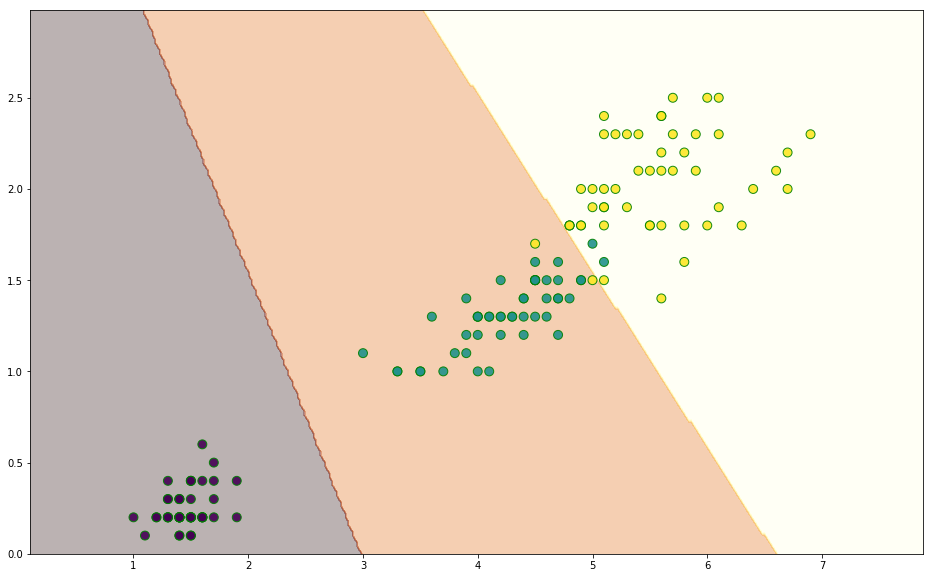

In [11]:
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(16,10))
ax = plt.contourf(xx, yy, z, cmap = 'afmhot', alpha = 0.3)
plt.scatter(X.values[:, 0], X.values[:, 1], c = y, s = 80, alpha = 0.9, edgecolors='g')
plt.show()

# Linear SVM Implementation


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [16]:
sc_x = StandardScaler()
X_std_train = sc_x.fit_transform(X_train)

In [18]:
C = 1.0
clf = svm.SVC(kernel='linear', C=C)
clf.fit(X_std_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [19]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [34]:
res = cross_val_score(clf, X_std_train, y_train, cv=10, scoring='accuracy')

In [35]:
print(np.mean(res), np.std(res))

0.95013986014 0.0537653103042


In [36]:
y_train_pred = cross_val_predict(clf, X_std_train, y_train, cv=3)

In [37]:
confusion_matrix(y_train, y_train_pred)

array([[39,  0,  0],
       [ 0, 34,  3],
       [ 0,  3, 41]])

In [38]:
print(precision_score(y_train, y_train_pred, average='weighted'), recall_score(y_train, y_train_pred, average='weighted'), f1_score(y_train, y_train_pred, average='weighted'))

0.95 0.95 0.95


## Cross Validation with test set

In [39]:
y_test_pred = cross_val_predict(clf, sc_x.transform(X_test), y_test, cv=3)

In [40]:
confusion_matrix(y_test, y_test_pred)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  2,  4]])

In [41]:
print(precision_score(y_test, y_test_pred, average='weighted'), recall_score(y_test, y_test_pred, average='weighted'), f1_score(y_test, y_test_pred, average='weighted'))

0.942222222222 0.933333333333 0.929047619048
